## Simulating a chemostat model with one species of phytoplankton and one limiting resource

Using Monod kinetics, we can simulate a model where the growth of a single species of phytoplankton is limited by a single limiting resource. Monod kinetics provides us with the following equations to model the rate of change of N (nutrient) and B (phytoplankton biomass) over time:

![Equations 1 and 2](./one_phyto_one_res.png)

We can model this with the following julia code:

**Step 0: Import appropriate packages**

In [1]:
using Plots, Interact; gr()

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-10865378165947529086\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-12389902722178061169\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-10865378165947529086\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

**Step 1: Set up the time interval**

In this case, we want to observe the behavior of our chemostat model over the course of 150 days with an interval of 0.1 days. From this, we can calculate the number of steps needed for timestepping.

In [2]:
#timestep
deltat = 0.1

#max days
max_days = 150.0

#number of steps to timestep
nstepmax = max_days/deltat

#create interval to plot points with 
nout = 0.5/deltat;

**Step 2: Set up phytoplankton characteristics.**

Variable definitions: 
* mu1 = the growth rate per day 
* dil1 = the dilution rate per day
* k1 = the half-saturation constant that represents the concentration at which half of the maximum intake rate is reached

In [3]:
#growth (day -1)
mu1 = 0.5

#dilution rate (day -1)
dil1 = 0.2

#half-saturation, K (micromol l -1)
k1 = 0.1;

**Step 3: Set up incoming nutrient and phytoplankton characteristics**

In [4]:
#incoming resource concentration (micromol -1)
nutin1 = 1.0

#phytoplankton (micromol -1)
phy1 = 0.002;

**Step 4: Initialize values to start timestepping**

Adjust phy1 to see how starting concentrations of phytoplankton can affect end levels of phytoplankton!

In [5]:
#initial time = 0
init_t = 0.0

#create arrays to hold data
phystore1 = Float64[]
nutstore1 = Float64[]
tstore = Float64[];

**Step 5: Use the Euler method to timestep through the given time and calculate nutrient and phytoplankton concentration throughout the given time period**

Use equation (1) to calculate to rate of change of nutrient concentration over time (**dnut1dt**) and use equation (2) to calculate the rate of change of phytoplankton biomass concentration over time (**dphy1dt**).

In [6]:
let tdays = init_t, nut1 = nutin1, phy1 = phy1
        for nstep = 1:nstepmax
            tdays = tdays + deltat;

            #net nutrient supply rate (micromol l-1 day -1)
            sn1 = dil1 * (nutin1-nut1);

            #rate of change of phytoplankton over time 
            grow1 = mu1*nut1/(nut1+k1)*phy1;
            loss1 = dil1*phy1;
            dphy1dt = grow1 - loss1;

            #rate of change of nutrients over time
            #dnut1dt = - (grow1+grow2) + sn1;
            dnut1dt = - grow1 + sn1;

            #forward step
            phy1 = phy1 + dphy1dt*deltat;
            nut1 = nut1 + dnut1dt*deltat;

            #if phytoplankton concentration gets very small, hold constant
            if (phy1 < 1.0e-30)
                phy1 = 1.0e-30;
            end

            # update variables for plotting
            # only plot at interval defined by nstep
            if mod(nstep, nout) == 0
                #phytoplankton
                push!(phystore1, phy1);
                #resources
                push!(nutstore1, nut1);
                #time
                push!(tstore, tdays);
            end
        end
    end

**Step 6: Plot results**

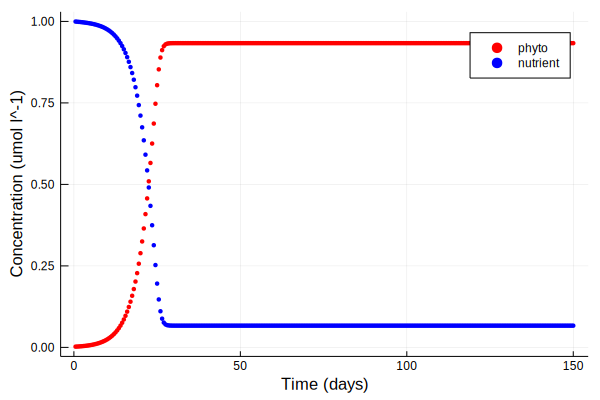

In [7]:
scatter(tstore, phystore1, label = "phyto", markercolor = :red,
            markerstrokewidth = 0, markersize = 2.5)
scatter!(tstore, nutstore1, label = "nutrient", markercolor = :blue,
            markerstrokewidth = 0, markersize = 2.5)
xlabel!("Time (days)")
ylabel!("Concentration (umol l^-1)")

**Step 7: Use the Interact.jl package to create an interactive plot of one_phyto_one_resource**

In [8]:
@manipulate for t in 1:1:length(tstore)
    scatter(tstore[1:t], phystore1[1:t], markercolor = :red, markerstrokewidth = 0, markersize = 1.5, label = "phyto")
    scatter!(tstore[1:t], nutstore1[1:t], markercolor = :blue, markerstrokewidth = 0, markersize = 1.5, 
            label = "nutrient")
    title!("Interactive plot of one_phyto_one_resource")
    xlabel!("Time (days)")
    ylabel!("Concentration (umol 1^-1)")
end 

┌ Warning: Accessing `scope.id` is deprecated, use `scopeid(scope)` instead.
│   caller = ip:0x0
└ @ Core :-1


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["t"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>300,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
150, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/gforget/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/gforget/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/gforget/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Users/gforget/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Users/gforget/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"